<h1>Importuri</h1>

In [10]:
import csv
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

<h1>Incarcare date</h1>

In [4]:
# load some data
crtDir =  os.getcwd()
fileName = os.path.join(crtDir, 'spam.csv')

data = []
with open(fileName) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            dataNames = row
        else:
            data.append(row)
        line_count += 1

inputs = [data[i][0] for i in range(len(data))][:100]
outputs = [data[i][1] for i in range(len(data))][:100]
labelNames = list(set(outputs))

print(inputs[:2])
print(labelNames[:2])

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...', 'Ok lar... Joking wif u oni...']
['ham', 'spam']


<h1>Impartire date (train si test)</h1>

In [5]:
# prepare data for training and testing
np.random.seed(5)
# noSamples = inputs.shape[0]
noSamples = len(inputs)
indexes = [i for i in range(noSamples)]
trainSample = np.random.choice(indexes, int(0.8 * noSamples), replace = False)
testSample = [i for i in indexes  if not i in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]
testInputs = [inputs[i] for i in testSample]
testOutputs = [outputs[i] for i in testSample]

print(trainInputs[:3])

['Today is \\song dedicated day..\\" Which song will u dedicate for me? Send this to all ur valuable frnds but first rply me..."', 'K tell me anything about you.', "Didn't you get hep b immunisation in nigeria."]


<h1>Extragere caracteristici: Word2Vec</h1>

In [6]:
# representation 3: embedded features extracted by a pre-train model (in fact, word2vec pretrained model)

import gensim 
from gensim.models import KeyedVectors

# Încarcă modelul pre-antrenat Word2Vec
word2vecModel300 = KeyedVectors.load_word2vec_format('C:/Users/ariis/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz', binary=True)

# Verificare
print(word2vecModel300.most_similar('support'))
print("vec for house: ", word2vecModel300["house"])

[('supporting', 0.6251285076141357), ('suport', 0.6071150302886963), ('suppport', 0.6053199768066406), ('Support', 0.6044272780418396), ('supported', 0.6009396314620972), ('backing', 0.6007589101791382), ('supports', 0.5269277691841125), ('assistance', 0.5207138061523438), ('sup_port', 0.5192490220069885), ('supportive', 0.5110024809837341)]
vec for house:  [ 1.57226562e-01 -7.08007812e-02  5.39550781e-02 -1.89208984e-02
  9.17968750e-02  2.55126953e-02  7.37304688e-02 -5.68847656e-02
  1.79687500e-01  9.27734375e-02  9.03320312e-02 -4.12109375e-01
 -8.30078125e-02 -1.45507812e-01 -2.37304688e-01 -3.68652344e-02
  8.74023438e-02 -2.77099609e-02  1.13677979e-03  8.30078125e-02
  3.57421875e-01 -2.61718750e-01  7.47070312e-02 -8.10546875e-02
 -2.35595703e-02 -1.61132812e-01 -4.78515625e-02  1.85546875e-01
 -3.97949219e-02 -1.58203125e-01 -4.37011719e-02 -1.11328125e-01
 -1.05957031e-01  9.86328125e-02 -8.34960938e-02 -1.27929688e-01
 -1.39648438e-01 -1.86523438e-01 -5.71289062e-02 -1.176

In [7]:
word = "casuta"
if (word in word2vecModel300.index_to_key):
    print("vec for house: ", word2vecModel300[word])
else:
    print("word was not found!")

word was not found!


<h1>Extragere caracteristici: NMF</h1>

In [8]:
# TF-IDF vectorization
tfidf_vec = TfidfVectorizer()
X_tfidf = tfidf_vec.fit_transform(inputs)

In [9]:
# NMF feature extraction
#NMF are nevoie de date numerice
nmf = NMF(n_components=10, random_state=42)
X_nmf = nmf.fit_transform(X_tfidf)
print('NMF Features:')
print(X_nmf)

NMF Features:
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.75434722e-02
  1.87937127e-03 0.00000000e+00 0.00000000e+00 1.81291395e-01
  4.18504468e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 5.14438648e-02 9.54917754e-02
  1.90029899e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.01200030e-01]
 [0.00000000e+00 0.00000000e+00 1.80761348e-02 0.00000000e+00
  0.00000000e+00 7.03434860e-03 0.00000000e+00 1.55495353e-01
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 3.52503958e-01
  0.00000000e+00 3.87986240e-04]
 [1.10260389e-02 1.01632814e-02 1.70904357e-02 1.93521787e-03
  4.30093888e-02 0.00000000e+00 4.37382602e-02 1.21727086e-01
  4.52812748e-03 1.94055167e-01]
 [9.90177077e-03 0.00000000e+00 2.99889185e-

C:\Users\ariis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [11]:
word_index = tfidf_vec.vocabulary_.get("casuta")

if word_index is not None:
    # Retrieve the corresponding vector from the NMF components
    word_vector = nmf.components_[:, word_index]
    print("vec for house: ", word_vector)
else:
    print("word was not found!")

word was not found!


<h1>Etichetarea textelor cu emotii folosind kMeans: tool</h1>

In [12]:
def featureComputation(model, data):
    features = []
    phrases = [ phrase.split() for phrase in data]
    for phrase in phrases:
        # compute the embeddings of all the words from a phrase (words of more than 2 characters) known by the model
        # vectors = [model[word] for word in phrase if (len(word) > 2) and (word in model.vocab.keys())]
        vectors = [model[word] for word in phrase if (len(word) > 2) and (word in model.index_to_key)]
        if len(vectors) == 0:
            result = [0.0] * model.vector_size
        else:
            result = np.sum(vectors, axis=0) / len(vectors)
        features.append(result)
    return features

trainFeatures = featureComputation(word2vecModel300, trainInputs)
testFeatures = featureComputation(word2vecModel300, testInputs)

In [13]:
unsupervisedClassifier = KMeans(n_clusters=2, random_state=0)
unsupervisedClassifier.fit(trainFeatures)

KMeans(n_clusters=2, random_state=0)

In [14]:
computedTestIndexes = unsupervisedClassifier.predict(testFeatures)
computedTestOutputs = [labelNames[value] for value in computedTestIndexes]
for i in range(0, len(testInputs)):
    print(testInputs[i], " -> ", computedTestOutputs[i])

As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune  ->  spam
WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.  ->  spam
XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL  ->  spam
Oh k...i'm watching here:)  ->  spam
Did you catch the bus ? Are you frying an egg ? Did you make a tea? Are you eating your mom's left over dinner ? Do you feel my Love ?  ->  spam
Wait that's still not all that clear, were you not sure about me being sarcastic or that that's why x doesn't want to live with us  ->  spam
Great! I hope you like your man well endowed. I am  &lt;#&gt;  inches...  ->  spam
Wow. I never realized that you were so embarassed by your accomodations. I thought you liked i

In [15]:
print("acc: ", accuracy_score(testOutputs, computedTestOutputs))

acc:  0.15


<h1>Etichetarea textelor cu emotii folosind kMeans: Azure</h1>

In [17]:
from azure.core.credentials import AzureKeyCredential
from azure.ai.textanalytics import TextAnalyticsClient

In [20]:
endpoint = os.environ["LANGUAGE_ENDPOINT"]
key = os.environ["LANGUAGE_KEY"]
client = TextAnalyticsClient(endpoint=endpoint, credential=AzureKeyCredential(key))

In [21]:
documents = [
    "By choosing a bike over a car, I’m reducing my environmental footprint. Cycling promotes eco-friendly transportation, and I’m proud to be part of that movement.."
]

result = client.analyze_sentiment(documents, show_opinion_mining=True)
docs = [doc for doc in result if not doc.is_error]

print("Let's visualize the sentiment of each of these documents")
for idx, doc in enumerate(docs):
    print(f"Document text: {documents[idx]}")
    print(f"Overall sentiment: {doc.sentiment}")

Let's visualize the sentiment of each of these documents
Document text: By choosing a bike over a car, I’m reducing my environmental footprint. Cycling promotes eco-friendly transportation, and I’m proud to be part of that movement..
Overall sentiment: positive


<h1> Cod kMeans Implementat </h1>

In [22]:
class KMeans:
    def __init__(self, n_clusters, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X):
        # Inițializează centroizii aleatoriu
        np.random.seed(42)
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]

        for _ in range(self.max_iter):
            # Atribuie fiecare punct la cel mai apropiat centroid
            labels = self._assign_clusters(X)

            # Recalculează pozițiile centroizilor
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])

            # Verifică dacă nu s-au mai produs schimbări semnificative în pozițiile centroizilor
            if np.all(self.centroids == new_centroids):
                break

            self.centroids = new_centroids

        self.labels_ = self._assign_clusters(X)

    def _assign_clusters(self, X):
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)

In [23]:
import matplotlib.pyplot as plt

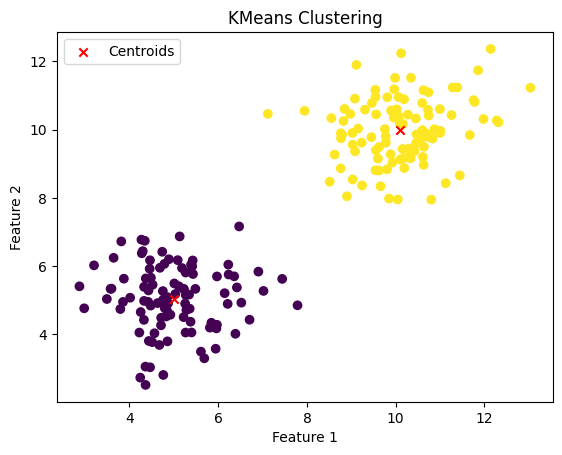

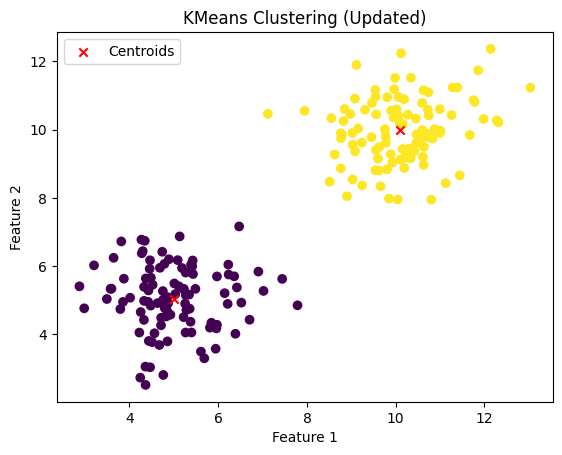

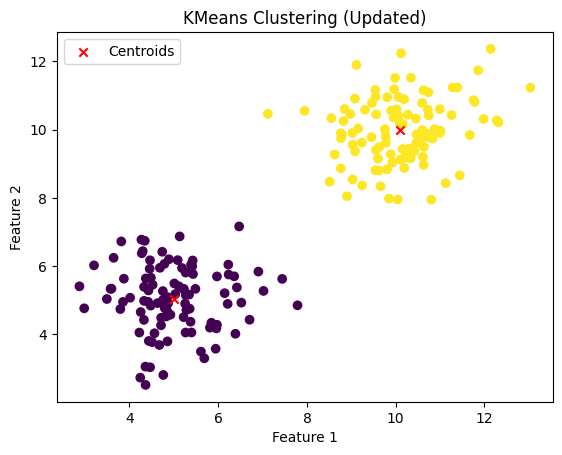

In [24]:
# Definirea a două clustere de puncte într-un spațiu bidimensional
cluster1 = np.random.randn(100, 2) + np.array([5, 5])
cluster2 = np.random.randn(100, 2) + np.array([10, 10])
X = np.concatenate([cluster1, cluster2])

# Aplicarea algoritmului KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# Vizualizarea rezultatelor
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], marker='x', color='red', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering')
plt.legend()
plt.show()

# Aplicarea algoritmului KMeans pentru a doua oară
kmeans.fit(X)

# Vizualizarea rezultatelor actualizate
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], marker='x', color='red', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering (Updated)')
plt.legend()
plt.show()

kmeans.fit(X)

# Vizualizarea rezultatelor actualizate
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], marker='x', color='red', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering (Updated)')
plt.legend()
plt.show()